In [73]:
import numpy as np
import pandas as pd
from collections import Counter
from functools import reduce

import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("Data/final_results.pkl")

In [3]:
df

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics,tf_idf,lexical_complexity,Chords_df,interval_sequence,comp1,comp2,harmonic_complexity
0,Hallelujah,Jeff Buckley,Rock,https://tabs.ultimate-guitar.com/tab/jeff_buck...,23157554,"[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...",i heard there was a secret chord that david pl...,"[heard, secret, chord, david, played, pleased,...","{'heard': 0.06606076697293795, 'secret': 0.088...",0.090656,chord root minor major 7th major 7th...,"[-9.0, 9.0, -9.0, 9.0, -9.0, 9.0, -9.0, 4.0, -...",1.127119,0.042017,-3.050021
1,Im Yours,Jason Mraz,Rock,https://tabs.ultimate-guitar.com/tab/jason_mra...,16413451,"[G, D, Em, C, G, D, Em, C, G, D, Em, C, G, D, ...","well you done done me and you bet i felt it, i...","[well, done, done, bet, felt, it,, tried, chil...","{'don': 0.06749892525209408, 'music': 0.053827...",0.075719,chord root minor major 7th major 7th ...,"[5.0, -2.0, 4.0, -7.0, 5.0, -2.0, 4.0, -7.0, 5...",1.180556,0.082192,-2.332715
2,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,12091872,"[Em7, G, Dsus4, A7sus4, Em7, G, Dsus4, A7sus4,...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac...","{'heard': 0.04545112221889412, 'don': 0.103286...",0.107676,chord root minor major 7th major 7...,"[-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -...",15.333333,0.084416,0.258026
3,Wish You Were Here,Pink Floyd,Rock,https://tabs.ultimate-guitar.com/tab/pink_floy...,10529033,"[Em7, G, Em7, G, Em7, A7sus4, Em7, A7sus4, G, ...","so, so you think you can tell, heaven from hel...","[so,, think, tell,, heaven, hell,, blue, skies...","{'cold': 0.17738530760119117, 're': 0.04458131...",0.133181,chord root minor major 7th major 7t...,"[-3.0, 3.0, -3.0, 3.0, -5.0, 5.0, -5.0, 2.0, 7...",6.420000,0.137255,-0.126497
4,Hey Soul Sister,Train,Rock,https://tabs.ultimate-guitar.com/tab/train/hey...,10423751,"[C, G, Am, F, C, G, Am, F, C, G, Am, F, G, C, ...",your lipstick stains on the front lobe of my l...,"[lipstick, stains, front, lobe, left, side, br...","{'don': 0.045072174119906036, 'you': 0.0604750...",0.102255,chord root minor major 7th major 7th...,"[-7.0, -2.0, 4.0, 5.0, -7.0, -2.0, 4.0, 5.0, -...",0.267857,0.035398,-4.658395
5,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,9452644,"[F#m, A, Esus4, B, F#m, A, Esus4, B, F#m, A, E...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac...","{'heard': 0.03935016847613902, 'don': 0.089422...",0.102723,chord root minor major 7th major 7t...,"[-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -...",2.065089,0.029412,-2.801187
6,The Only Exception,Paramore,Rock,https://tabs.ultimate-guitar.com/tab/paramore/...,9420989,"[G, Dm, Cmaj7, G, Dm, Cmaj7, G, Dm, Cmaj7, G, ...",when i was younger i saw my daddy cry and curs...,"[younger, saw, daddy, cry, curse, wind, mama, ...","{'you': 0.011730649469387785, 'like': 0.013389...",0.046701,chord root minor major 7th major 7th...,"[5.0, 2.0, -7.0, 5.0, 2.0, -7.0, 5.0, 2.0, -7....",4.840580,0.100000,-0.725551
7,Love Story,Taylor Swift,Rock,https://tabs.ultimate-guitar.com/tab/taylor_sw...,8964458,"[C, G, Am, F, C, F, Am, F, C, F, Am, G, F, G, ...",we were both young when i first saw you i clos...,"[young, first, saw, close, eyes, flashback, st...","{'don': 0.08138220859348926, 'really': 0.03751...",0.078454,chord root minor major 7th major 7th ...,"[-7.0, -2.0, 4.0, 5.0, -5.0, -4.0, 4.0, 5.0, -...",0.455696,0.087500,-3.222045
8,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,8841766,"[Bm, Bsus2, G, D, Em, G, Bm, A, G, D, Em, G, B...",and i'd give up forever to touch you 'cause i ...,"[i'd, give, forever, touch, 'cause, know, feel...","{'don': 0.27428864541810055, 'you': 0.06133729...",0.114617,chord root minor major 7th major 7t...,"[-0.0, 4.0, 5.0, -2.0, -3.0, -4.0, 2.0, 2.0, 5...",2.490446,0.050633,-2.070692
9,Let It Be,The Beatles,Rock,https://tabs.ultima

In [42]:
df.Chords = df.Chords.apply(lambda cl : [ c.strip() for c in cl ])

In [8]:
chords = df.Chords[0]

In [11]:
a = np.arange(10)

In [13]:
list(zip(a,a[1:]))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [43]:
df['chord_bigrams'] = df.Chords.apply(lambda cl : list(zip(cl,cl[1:])))

In [44]:
all_bigrams = [bigram for cl in df['chord_bigrams'].values for bigram in cl]

In [45]:
nb_bigrams = len(all_bigrams)

In [46]:
freq = Counter(all_bigrams)
for key in freq:
    freq[key] /= nb_bigrams

In [47]:
freq

Counter({('C', 'Am'): 0.010683922974485172,
         ('Am', 'C'): 0.011385213653142138,
         ('Am', 'F'): 0.018071526585752406,
         ('F', 'G'): 0.014208098514884072,
         ('G', 'C'): 0.026613601494736523,
         ('C', 'G'): 0.042573660838612,
         ('C', 'F'): 0.010833295357303803,
         ('G', 'Am'): 0.01976525750279757,
         ('G', 'E7'): 0.00035950641288552,
         ('E7', 'Am'): 0.0015215729165084333,
         ('F', 'Am'): 0.00899019205744001,
         ('F', 'C'): 0.02290460927729084,
         ('G', 'D'): 0.03240874360103902,
         ('D', 'Em'): 0.015395482371527092,
         ('Em', 'C'): 0.017666448937430693,
         ('C', 'A7'): 0.0003114034421473166,
         ('A7', 'G'): 0.00020000708885884564,
         ('G', 'G'): 0.008352194761333313,
         ('G', 'Bm'): 0.00564576972348387,
         ('Bm', 'Em'): 0.0020861498888568204,
         ('Em', 'D'): 0.010633288268444958,
         ('D', 'C'): 0.011154825740659163,
         ('Em7', 'G'): 0.00116206650362291

In [75]:
freq.most_common(20)

[(('C', 'G'), 0.042573660838612),
 (('G', 'D'), 0.03240874360103902),
 (('G', 'C'), 0.026613601494736523),
 (('F', 'C'), 0.02290460927729084),
 (('D', 'G'), 0.02110454547756123),
 (('G', 'Am'), 0.01976525750279757),
 (('Am', 'F'), 0.018071526585752406),
 (('Em', 'C'), 0.017666448937430693),
 (('D', 'A'), 0.01625627237421073),
 (('D', 'Em'), 0.015395482371527092),
 (('Am', 'G'), 0.014392915191930854),
 (('F', 'G'), 0.014208098514884072),
 (('C', 'D'), 0.013349840247502444),
 (('G', 'F'), 0.011729529654215592),
 (('Am', 'C'), 0.011385213653142138),
 (('G', 'Em'), 0.011382681917840125),
 (('D', 'C'), 0.011154825740659163),
 (('A', 'D'), 0.011048492857974714),
 (('C', 'F'), 0.010833295357303803),
 (('C', 'Am'), 0.010683922974485172)]

In [48]:
df_bg = pd.DataFrame(all_bigrams, columns=["first_chord","second_chord"])
df_bg

,first_chord,second_chord
0,C,Am
1,Am,C
2,C,Am
3,Am,C
4,C,Am
5,Am,C
6,C,Am
7,Am,F
8,F,G
9,G,C


In [90]:
df_bg.groupby(["first_chord","second_chord"]).size()+1

first_chord  second_chord
A            A               1943
             A#                34
             A#/A               2
             A#dim7             9
             A(7)               2
             A-5               25
             A/Ab               8
             A/B                7
             A/C#              33
             A/D                5
             A/G                5
             A/G#              57
             A11                2
             A2                13
             A5                21
             A5/Gb              2
             A6                45
             A7               297
             A7+               13
             A7/G               4
             A7sus              3
             A7sus4            19
             A9                 9
             AM                 2
             AM7                2
             Aadd9              8
             Aaug              14
             Ab                16
             Ab7      

In [54]:
prob = df_bg.groupby(["first_chord","second_chord"]).size() / df_bg.groupby("first_chord").size()
prob

first_chord  second_chord
A            A               0.080059
             A#              0.001360
             A#/A            0.000041
             A#dim7          0.000330
             A(7)            0.000041
             A-5             0.000989
             A/Ab            0.000289
             A/B             0.000247
             A/C#            0.001319
             A/D             0.000165
             A/G             0.000165
             A/G#            0.002309
             A11             0.000041
             A2              0.000495
             A5              0.000825
             A5/Gb           0.000041
             A6              0.001814
             A7              0.012203
             A7+             0.000495
             A7/G            0.000124
             A7sus           0.000082
             A7sus4          0.000742
             A9              0.000330
             AM              0.000041
             AM7             0.000041
             Aadd9      

In [62]:
# sanity check 
prob.sum(level=0)

first_chord
A           1.0
A#          1.0
A#/A        1.0
A#/D        1.0
A#/F        1.0
A#5         1.0
A#6/F       1.0
A#7         1.0
A#7#5       1.0
A#M7        1.0
A#Maj7      1.0
A#dim       1.0
A#dim7      1.0
A#m         1.0
A#m/G#      1.0
A#m7        1.0
A#m7b5      1.0
A#maj7      1.0
A#o         1.0
A(2)        1.0
A(maj)      1.0
A+          1.0
A-5         1.0
A-9         1.0
A/Ab        1.0
A/B         1.0
A/C#        1.0
A/D         1.0
A/E         1.0
A/F#        1.0
           ... 
Gm/F        1.0
Gm11        1.0
Gm11/C      1.0
Gm6         1.0
Gm7         1.0
Gm7-5       1.0
Gm7-5/Db    1.0
Gm7/Bb      1.0
Gm7/C       1.0
Gm7/F       1.0
Gm7add4     1.0
Gm7b5       1.0
Gm9         1.0
Gma7        1.0
Gmadd11     1.0
Gmaj        1.0
Gmaj13      1.0
Gmaj7       1.0
Gmaj7/A     1.0
Gmin7       1.0
Gsus        1.0
Gsus2       1.0
Gsus2/B     1.0
Gsus4       1.0
H           1.0
Hb          1.0
Hm          1.0
Hm7         1.0
С           1.0
Сm          1.0
Length: 956,

In [84]:
df_prob = pd.DataFrame(prob, columns=["prob"]).reset_index()
df_prob

,first_chord,second_chord,prob
0,A,A,0.080059
1,A,A#,0.001360
2,A,A#/A,0.000041
3,A,A#dim7,0.000330
4,A,A(7),0.000041
5,A,A-5,0.000989
6,A,A/Ab,0.000289
7,A,A/B,0.000247
8,A,A/C#,0.001319
9,A,A/D,0.000165


In [117]:
prob_array_df = df_prob.pivot(index="first_chord", columns="second_chord", values="prob")
prob_array_df

second_chord,A,A#,A#/A,A#/D,A#/F,A#5,A#6/F,A#7,A#7#5,A#M7,...,Gmin7,Gsus,Gsus2,Gsus2/B,Gsus4,H,Hb,Hm,Hm7,С
first_chord,,,,,,,,,,,,,,,,,,,,,
A,0.080059,0.001360,0.000041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000082,NaN,0.000660,NaN,NaN
A#,0.034420,0.035326,NaN,NaN,NaN,NaN,NaN,0.007246,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#/F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#6/F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043478,0.014493,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#7#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
list("ABCDEFG")

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [120]:
prob_array_df.loc[list("ABCDEFG")][list("ABCDEFG")]

second_chord,A,B,C,D,E,F,G
first_chord,,,,,,,
A,0.080059,0.044688,0.015583,0.179907,0.161974,0.004823,0.127881
B,0.141259,0.048903,0.033271,0.019647,0.194034,0.007027,0.011616
C,0.007516,0.007579,0.056434,0.110090,0.011003,0.089338,0.351087
D,0.164397,0.003072,0.112807,0.053177,0.033873,0.012520,0.213426
E,0.177886,0.129138,0.018359,0.106328,0.080946,0.024200,0.034006
F,0.009369,0.001098,0.354659,0.008938,0.017719,0.048453,0.220001
G,0.065742,0.003517,0.176027,0.214357,0.005961,0.077581,0.055243


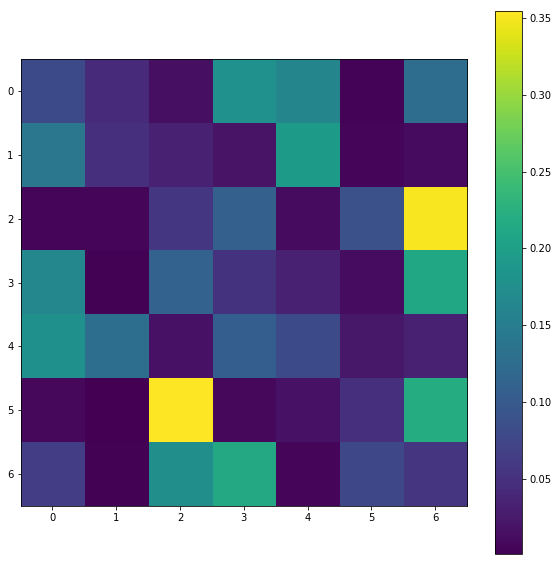

In [121]:
plt.figure(figsize=(10,10))
plt.imshow(prob_array_df.loc[list("ABCDEFG")][list("ABCDEFG")])
plt.colorbar()
plt.show()

In [131]:
df.chord_bigrams.apply(lambda bg_list : np.mean([ freq[bg] for bg in bg_list ]))

0       0.019056
1       0.020906
2       0.002217
3       0.003720
4       0.023515
5       0.001341
6       0.006498
7       0.018807
8       0.006220
9       0.010966
10      0.000575
11      0.015243
12      0.020467
13      0.014757
14      0.005344
15      0.021994
16      0.003499
18      0.017682
19      0.013658
20      0.017518
21      0.015157
22      0.016961
23      0.002360
24      0.000612
25      0.001100
26      0.005402
27      0.005505
28      0.007258
29      0.016902
30      0.010515
          ...   
5165    0.000040
5166    0.006037
5167    0.008906
5169    0.006730
5172    0.018266
5173    0.022579
5175    0.004869
5176    0.010009
5177    0.000445
5178    0.001587
5179    0.010648
5180    0.006362
5181    0.000860
5182    0.006463
5183    0.014289
5184    0.017816
5185    0.007950
5186    0.000149
5187    0.023241
5188    0.007593
5189    0.016461
5190    0.003006
5192    0.004302
5193    0.000059
5194    0.007287
5195    0.013319
5196    0.007561
5197    0.0002

In [58]:
chord_set_by_song = df['Chords'].apply(set)
all_chords = reduce(set.union, chord_set_by_song)

In [59]:
len(all_chords)

968

In [71]:
len(set(df_bg.second_chord.unique()).union(set(df_bg.first_chord.unique())))

968